In [1]:
using MagneticEquilibria

In [2]:
using PyPlot

In [3]:
const R0 = 1.
const B0 = 1.
const q  = 2.
;

In [4]:
eq = AxisymmetricTokamak(R0, B0, q)

Axisymmetric Tokamak Equilibrium with
  R₀ = 1.0
  B₀ = 1.0
  q  = 2.0

In [5]:
load_equilibrium(eq)

Generating function db₂dx₂
Generating function db₁dx₂
Generating function B₃
Generating function dB₂dx₁
Generating function dBdx₂
Generating function db₃dx₂
Generating function g₃₂
Generating function g₂₂
Generating function dA₃dx₃
Generating function dA₃dx₂
Generating function A₃
Generating function dA₁dx₂
Generating function dB₁dx₃
Generating function B₂
Generating function b₁
Generating function dBdx₃
Generating function dB₁dx₁
Generating function g₂₁
Generating function dBdx₁
Generating function g₂₃
Generating function b₂
Generating function g₁₁
Generating function dA₁dx₁
Generating function dB₂dx₃
Generating function db₁dx₃
Generating function h₃
Generating function dA₂dx₃
Generating function db₃dx₃
Generating function g₁₂
Generating function B
Generating function dA₂dx₂
Generating function dB₃dx₂
Generating function dB₁dx₂
Generating function dB₃dx₁
Generating function dB₂dx₂
Generating function dA₂dx₁
Generating function h₂
Generating function dA₁dx₃
Generating function g₃₃
Gene

In [6]:
nr = 100
nz = 120

120

In [7]:
rgrid = linspace( 0.25, 2.75, nr)
zgrid = linspace(-2.0, +2.0,  nz)
;

In [8]:
field = zeros((nr,nz))
potAR = zeros((nr,nz))
potAZ = zeros((nr,nz))
potAP = zeros((nr,nz))
;

In [9]:
for i in 1:nr
    for j in 1:nz
        field[i,j] = B(rgrid[i], zgrid[j], 0.0)
        potAR[i,j] = A₁(rgrid[i], zgrid[j], 0.0)
        potAZ[i,j] = A₂(rgrid[i], zgrid[j], 0.0)
        potAP[i,j] = A₃(rgrid[i], zgrid[j], 0.0)
    end
end

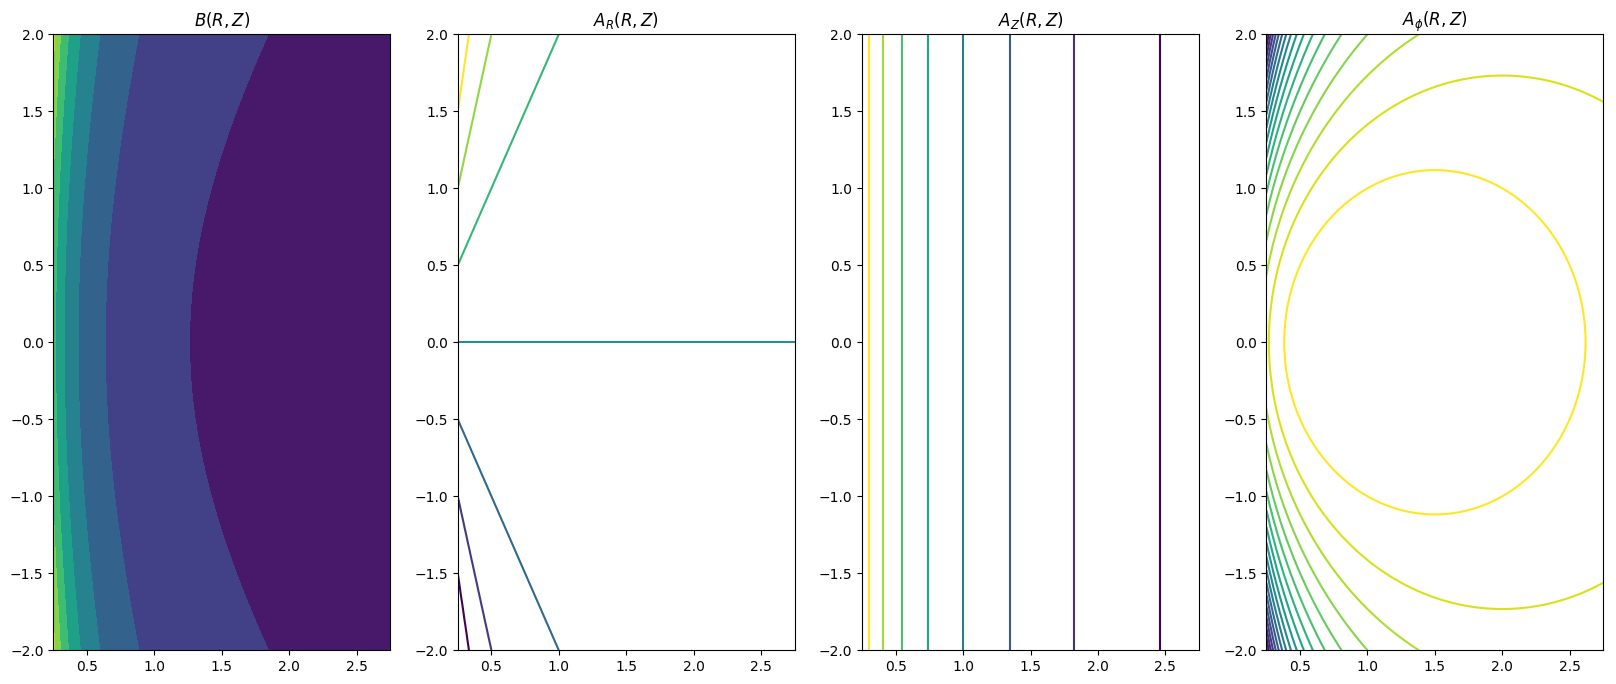

In [10]:
fig, axes = subplots(1, 4, figsize=(20,8))
axes[1][:contourf](rgrid, zgrid, field.')
axes[2][:contour](rgrid, zgrid, potAR.')
axes[3][:contour](rgrid, zgrid, potAZ.')
axes[4][:contour](rgrid, zgrid, potAP.', 20)
axes[1][:set_title](L"$B(R,Z)$")
axes[2][:set_title](L"$A_R(R,Z)$")
axes[3][:set_title](L"$A_Z(R,Z)$")
axes[4][:set_title](L"$A_\phi(R,Z)$")
show()